In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data.csv")

data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

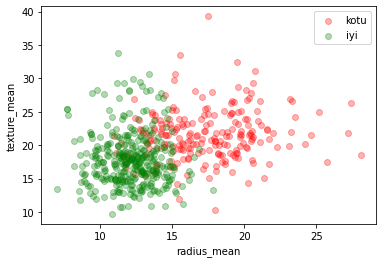

In [2]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [3]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [4]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
error = []
for i in range(1,10):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(x_train,y_train)
  pred_i = dt.predict(x_test)  
  error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

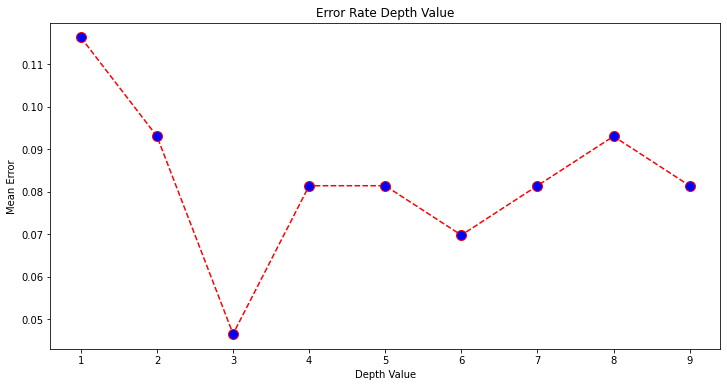

In [7]:
plt.figure(figsize=(12 , 6))
plt.plot(range(1 , 10), error, color='red', linestyle ='dashed', marker='o', markerfacecolor ='blue', markersize=10 )
plt.title('Error Rate Depth Value')
plt.xlabel('Depth Value')
plt.ylabel('Mean Error')

En iyi sonuç max_depth=3 için çıkmakta.
Önceki hafta SVM kullanarak aldığımız accuracy 0.96 ve Naive bayes için 0.93 çıkmıştı.

In [8]:
dt = DecisionTreeClassifier(max_depth=3,criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
print("score: ", dt.score(x_test,y_test))

score:  0.9534883720930233


In [10]:
y_pred = dt.predict(x_test)  
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[54,  0],
       [ 4, 28]])

In [14]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1, x2, dt.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('purple','green'))(i), label = j)
plt.title('Decision Tree Algorithm (Training set)')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend()
plt.show()

TypeError: ignored